In [1]:
import pandas as pd

### Overview

In [2]:
df = pd.read_csv('hotel.csv')
df.shape

(119390, 32)

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Preprocessing

In [5]:
set(df['meal'])
# BB: Bed & Breakfast , HB: Half Board (Breakfast and Dinner normally)
# FB: Full Board (Beakfast, Lunch and Dinner)

{'BB', 'FB', 'HB', 'SC', 'Undefined'}

In [6]:
mapper = {'SC' : 0, 
          'Undefined' : 0, 
          'BB' : 1, 
          'HB' : 2, 
          'FB' : 3}
df['Day_stay'] = df['meal'].map(mapper)
df[['meal', 'Day_stay']].head(10).T

,0,1,2,3,4,5,6,7,8,9
meal,BB,BB,BB,BB,BB,BB,BB,FB,BB,HB
Day_stay,1,1,1,1,1,1,1,3,1,2


In [7]:
df['country']

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [8]:
df['Foreigner'] = 1
df.loc[df['country'] == 'PRT', 'Foreigner'] = 0

df[['country', 'Foreigner']].head()

,country,Foreigner
0,PRT,0
1,PRT,0
2,GBR,1
3,GBR,1
4,GBR,1


In [9]:
# Frequency encoding
cr = pd.DataFrame(df['country'].value_counts(normalize = True)).reset_index()
cr.columns = ['country', 'country_ratio']
cr.head()

,country,country_ratio
0,PRT,0.408656
1,GBR,0.102008
2,FRA,0.087593
3,ESP,0.072059
4,DEU,0.061286


In [10]:
df = pd.merge(df, cr)
df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,1
lead_time,342,737,0,9,85
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,2,2,3
adults,2,2,2,2,2


In [11]:
df['car_yes'] = 0 
df.loc[df['required_car_parking_spaces'] > 0, 'car_yes'] = 1
set(df['car_yes'])

{0, 1}

In [12]:
set(df['reserved_room_type'])

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P'}

In [13]:
set(df['assigned_room_type'])

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P'}

In [14]:
df['RA'] = df['reserved_room_type'] + df['assigned_room_type']
df['RA_changed'] = df['RA'].apply(lambda x : 0 if x[0] == x[1] else 1)

In [15]:
import numpy as np

In [16]:
# ratio in which reserved room and actual room are different
np.mean(df['RA_changed'])

0.12362281542783132

In [17]:
interested = ['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 
       'Foreigner', 'country_ratio', 'car_yes', 'RA',
       'RA_changed']

df[interested].to_csv('hotel_modified.csv', index = False)

In [18]:
# Feature selection
df = pd.read_csv('hotel_modified.csv')

In [20]:
from sklearn.ensemble import RandomForestClassifier as rf

features = ['lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights','is_repeated_guest', 
        'previous_cancellations', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'Foreigner', 'country_ratio',
       'car_yes', 'RA_changed']   # 용량 넘 많대서..내가 좀 추렷음..
label = 'is_canceled'
x, y = df[features], df[label]

model = rf()
model.fit(x, y)

RandomForestClassifier()

In [21]:
model.feature_importances_  

array([0.21157941, 0.03226735, 0.0910605 , 0.0866242 , 0.02923634,
       0.04997997, 0.00712542, 0.03469811, 0.15309877, 0.01553171,
       0.06032027, 0.06679659, 0.09675774, 0.01789385, 0.04702977])

In [22]:
fi_df = pd.DataFrame()
fi_df['feature'] = features
fi_df['imp'] = model.feature_importances_
fi_df.sort_values(by = 'imp', ascending = False).head(5) 

# 'lead_time' is the most important feature

,feature,imp
0,lead_time,0.211579
8,adr,0.153099
12,country_ratio,0.096758
2,arrival_date_week_number,0.091060
3,arrival_date_day_of_month,0.086624


### EDA

In [23]:
import seaborn as sns

<AxesSubplot:xlabel='lead_time', ylabel='is_canceled'>

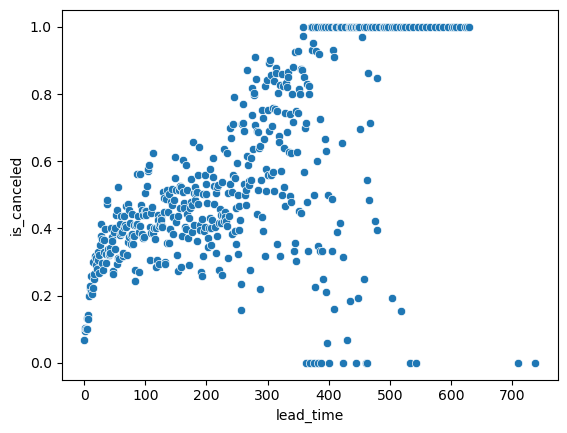

In [24]:
tgt = df.groupby('lead_time').agg({label : np.mean}).reset_index()
sns.scatterplot(data = tgt, x = 'lead_time', y = 'is_canceled')

<AxesSubplot:xlabel='lead_time', ylabel='is_canceled'>

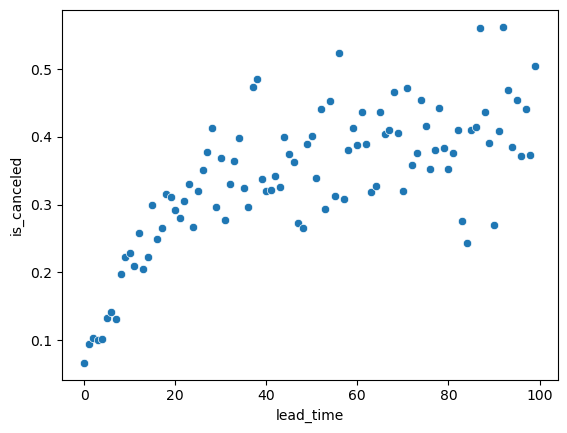

In [25]:
# Adjust range to be less than 100 days and create a scatter plot again
tgt = df.groupby('lead_time').agg({label : np.mean}).reset_index()

tgt = tgt.loc[tgt['lead_time'] < 100]
sns.scatterplot(data = tgt, x = 'lead_time', y = 'is_canceled')

In [26]:
tgt2 = df.groupby('Foreigner').agg({label : np.mean}).reset_index()
tgt2

# The average cancellation rate of registers is higher than foreigners'.

,Foreigner,is_canceled
0,0,0.566351
1,1,0.236631


In [27]:
tgt = df.groupby(['lead_time', 'Foreigner']).agg({label : np.mean}).reset_index()
tgt

,lead_time,Foreigner,is_canceled
0,0,0,0.094070
1,0,1,0.026661
2,1,0,0.139472
3,1,1,0.039012
4,2,0,0.127173
...,...,...,...
884,622,0,1.000000
885,626,0,1.000000
886,629,0,1.000000
887,709,1,0.000000


<AxesSubplot:xlabel='lead_time', ylabel='is_canceled'>

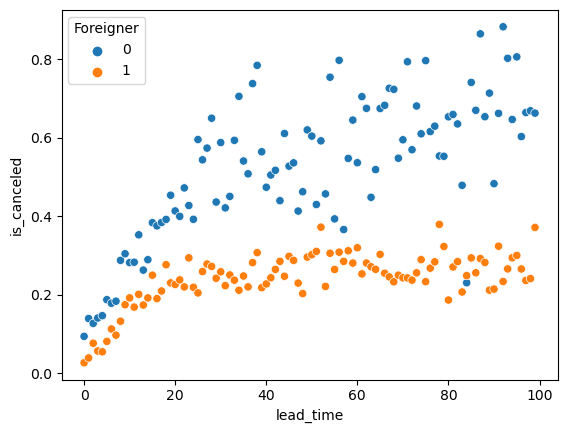

In [28]:
tgt = tgt.loc[tgt['lead_time'] < 100]
sns.scatterplot(data = tgt, x = 'lead_time', y = 'is_canceled', hue = 'Foreigner')

<AxesSubplot:xlabel='lead_time', ylabel='is_canceled'>

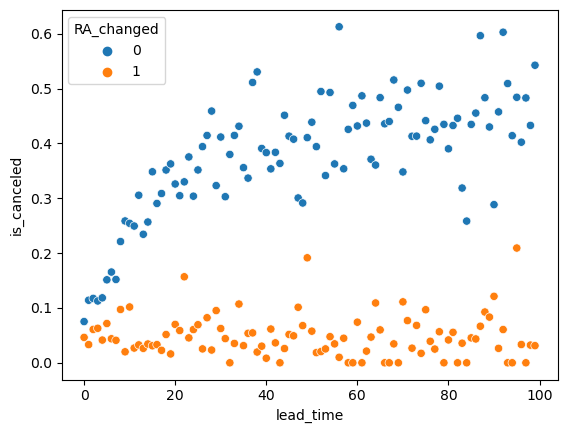

In [29]:
# Room Change
tgt = df.groupby(['lead_time', 'RA_changed']).agg({label : np.mean}).reset_index()
tgt = tgt.loc[tgt['lead_time'] < 100]
sns.scatterplot(data = tgt, x = 'lead_time', y = 'is_canceled', hue = 'RA_changed')

# The cancellation rate is much higher where the rooms are changed.

<AxesSubplot:xlabel='lead_time', ylabel='is_canceled'>

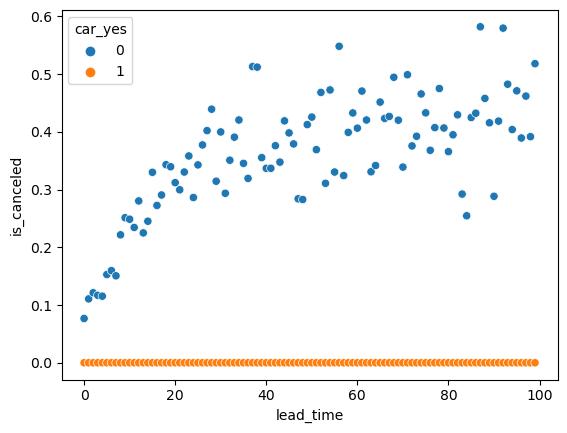

In [30]:
# Having cars
tgt = df.groupby(['lead_time', 'car_yes']).agg({label : np.mean}).reset_index()
tgt = tgt.loc[tgt['lead_time'] < 100]
sns.scatterplot(data = tgt, x = 'lead_time', y = 'is_canceled', hue = 'car_yes')

# Thoes who have cars tend to less cancel

In [31]:
# Market segement
# “TA” means “Travel Agents” and “TO” means “Tour Operators”
set(df['market_segment'])

{'Aviation',
 'Complementary',
 'Corporate',
 'Direct',
 'Groups',
 'Offline TA/TO',
 'Online TA',
 'Undefined'}

### Data Preparation

In [34]:
# Train/test split
train, test = df[0::2], df[1::2]

train = train.reset_index()
test = test.reset_index()

x_train, y_train = train[features], train[label]
x_test, y_test =  test[features], test[label]

### Modeling

In [36]:
from sklearn.tree import DecisionTreeClassifier as dt
df = pd.read_csv('hotel_modified.csv')

features = ['lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights','is_repeated_guest', 
        'previous_cancellations', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'Foreigner', 'country_ratio',
       'car_yes', 'RA_changed'] 
label = 'is_canceled'

train, test = df[0::2], df[1::2]
train = train.reset_index()
test = test.reset_index()
x_train, y_train = train[features], train[label]
x_test, y_test =  test[features], test[label]

model = dt(max_depth = 4)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [37]:
model.predict(x_test)

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [38]:
for_plot = pd.DataFrame()
for_plot['predict'] = model.predict(x_test)
for_plot['actual'] = y_test
for_plot

,predict,actual
0,1,0
1,0,0
2,1,1
3,1,0
4,1,0
...,...,...
59446,0,0
59447,0,0
59448,0,0
59449,0,0


In [41]:
# ROC curve
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import GradientBoostingClassifier as gb

In [42]:
m1, m2, m3 = dt(), rf(), gb()
m1.fit(x_train, y_train)
m2.fit(x_train, y_train)
m3.fit(x_train, y_train)

GradientBoostingClassifier()

In [43]:
r1 = pd.DataFrame(m1.predict_proba(x_test), columns = ['neg', 'pos'])
r2 = pd.DataFrame(m2.predict_proba(x_test), columns = ['neg', 'pos'])
r3 = pd.DataFrame(m3.predict_proba(x_test), columns = ['neg', 'pos'])
r3

,neg,pos
0,0.551601,0.448399
1,0.793065,0.206935
2,0.335421,0.664579
3,0.350805,0.649195
4,0.382840,0.617160
...,...,...
59446,0.769565,0.230435
59447,0.622011,0.377989
59448,0.836786,0.163214
59449,0.615292,0.384708


In [44]:
from sklearn.metrics import roc_curve

x, y, _ = roc_curve(y_test, r1['pos'])   
print(x)
print(y)

[0.         0.14012739 0.14018091 0.14031472 0.14034149 0.1404753
 0.14052882 0.14063587 0.14103731 0.14114436 0.14138522 0.14143874
 0.14157255 0.14159931 0.14184018 0.14197399 0.14454317 0.14534604
 0.14556013 0.14572071 0.14612214 0.14638977 0.14762083 0.14823636
 0.14826313 0.14877161 0.14895895 0.15010973 0.15061821 0.15077878
 0.15099288 0.15163518 0.15182251 0.15249157 0.15273243 0.15321415
 0.15358882 0.15407055 1.        ]
[0.         0.77509622 0.77554902 0.77618293 0.77654517 0.77708852
 0.77726964 0.77763188 0.77908082 0.77944306 0.78030337 0.78057505
 0.78089201 0.7813448  0.78175232 0.78193344 0.78406158 0.78519357
 0.78537469 0.78564637 0.78582748 0.78596332 0.7869142  0.78705003
 0.78705003 0.78732171 0.78736699 0.78791035 0.78800091 0.78800091
 0.78804619 0.78813674 0.7882273  0.7884537  0.78849898 0.78854426
 0.78858954 0.78863482 1.        ]


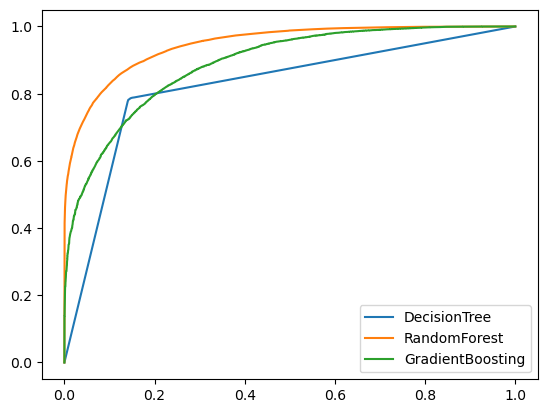

In [45]:
x1, y1, _ = roc_curve(y_test, r1['pos'])  
x2, y2, _ = roc_curve(y_test, r2['pos'])  
x3, y3, _ = roc_curve(y_test, r3['pos'])  
plt.plot(x1, y1, label = 'DecisionTree')
plt.plot(x2, y2, label = 'RandomForest')
plt.plot(x3, y3, label = 'GradientBoosting')
plt.legend()